In [13]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./practice1.csv')
df

,rowid,A,B,C,Class
0,1,0,0,1,P
1,2,1,0,1,P
2,3,0,1,0,P
3,4,1,0,0,P
4,5,1,0,1,P
5,6,0,1,1,N
6,7,1,1,0,N
7,8,0,0,0,N
8,9,0,1,0,N
9,10,1,1,1,N


In [14]:
CustomerData = df[['A', 'B','C']].astype('int')
CustomerData

,A,B,C
0,0,0,1
1,1,0,1
2,0,1,0
3,1,0,0
4,1,0,1
5,0,1,1
6,1,1,0
7,0,0,0
8,0,1,0
9,1,1,1


In [15]:
CustomerData = np.array(CustomerData)
CustomerData

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 1, 1]])

In [17]:
CustomerTarget = df['Class']
CustomerTarget = np.array(CustomerTarget)
CustomerTarget[:10]

array(['P', 'P', 'P', 'P', 'P', 'N', 'N', 'N', 'N', 'N'], dtype=object)

In [18]:
from sklearn.tree import DecisionTreeClassifier
myDT = DecisionTreeClassifier(criterion = 'gini', max_depth=2)
myDT

DecisionTreeClassifier(max_depth=2)

In [19]:
myDT.fit(CustomerData, CustomerTarget)
y_pred = myDT.predict(CustomerData)
y_pred

array(['N', 'P', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N'], dtype=object)

In [20]:
from sklearn import metrics
acc = metrics.accuracy_score(CustomerTarget, y_pred)
print("Accuracy: {:.2f}".format(acc))

Accuracy: 0.80


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


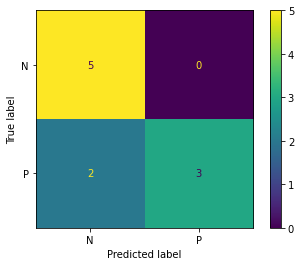

In [21]:
mycm = metrics.confusion_matrix(CustomerTarget, y_pred)
#print('Confusion Matrix: \n', mycm)
metrics.plot_confusion_matrix(myDT,CustomerData, CustomerTarget)

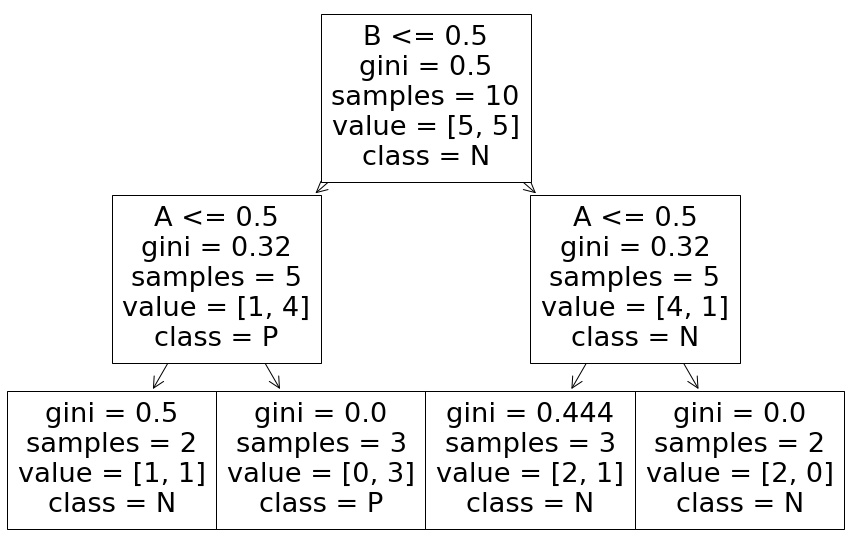

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
A=['N', 'P']
F=['A','B','C']
plot_tree(myDT, feature_names=F, class_names=A)

plt.show()